# GemPy Paper Code: Compute Forward Gravity

In this notebook you will be able to see and run the code utilized to create the figures of the paper *GemPy - an open-source library for implicit geological modeling and uncertainty quantification*

In [1]:
# Importing dependencies

# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

import gempy as gp
%matplotlib inline

# Aux imports

import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

## Gravity

For the gravity we need to increment the extent of the model to extrapolate enough voxels around the points where we simulate the gravity response to avoid (or at least reduce) boundaries error. Other than that the model and the code is the same as in the previous notebook

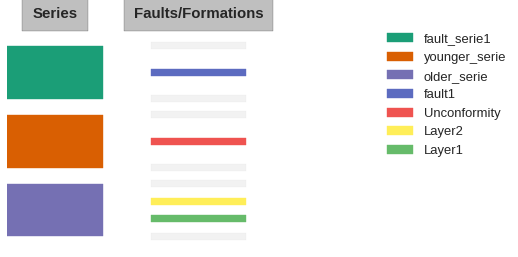

In [2]:
geo_data_g = gp.create_data([-10e3,30e3,-10e3,20e3,-10e3,0],[50,50,50],
                         path_o = "input_data/paper_Orientations.csv",
                         path_i = "input_data/paper_Points.csv")
geo_data_g.add_interface(X=10, Y=4, Z=-7, formation='fault1')

gp.set_series(geo_data_g, {'fault_serie1': 'fault1','younger_serie' : 'Unconformity', 'older_serie': ('Layer1', 'Layer2')},
              order_formations= ['fault1', 'Unconformity', 'Layer2', 'Layer1'], verbose=2)

geo_data_g.modify_interface(9, Z = -6.4)

We extend everything to km to get a more realistic example

In [3]:
geo_data_g.interfaces[['X', 'Y', 'Z']] = geo_data_g.interfaces[['X', 'Y', 'Z']]*1000
geo_data_g.orientations[['X', 'Y', 'Z']] = geo_data_g.orientations[['X', 'Y', 'Z']]*1000

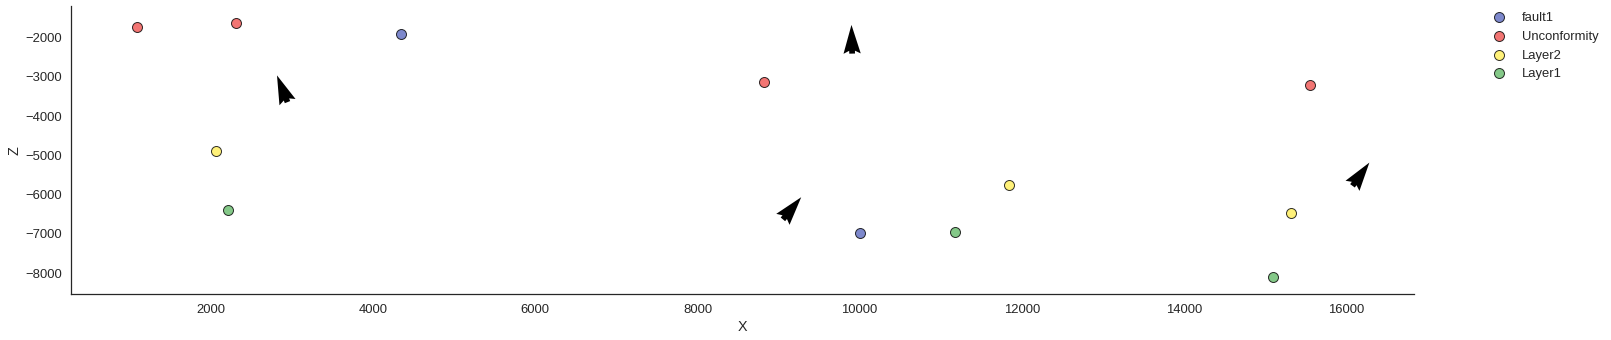

In [4]:
gp.plot_data(geo_data_g)

In [6]:
# Theano compilation
interp_data_g = gp.InterpolatorData(geo_data_g, u_grade=[1, 1, 1], dtype='float64', verbose=[],  output='gravity', compile_theano=True)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64


In [7]:
# Set the specific parameters for the measurement grid of gravity:
gp.set_geophysics_obj(interp_data_g,  
                      [0.1e3,19.9e3,.1e3,.9e3, -10e3, 0], # Extent
                      [30,20])                            # Resolution 

In [8]:
# Setting desity and precomputations 
t = gp.precomputations_gravity(interp_data_g, 25,
                         [2.92e6, 3.1e6, 2.61e6, 2.92e6])

[ 2920000.  3100000.  2610000.  2920000.]


In [9]:
lith, fault, grav = gp.compute_model(interp_data_g, output='gravity')

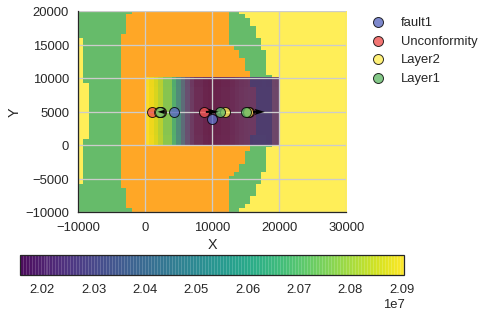

In [13]:
gp.plot_section(geo_data_g, lith[0], 5, direction='z',plot_data=True)
#annotate_plot(gp.get_data(geo_data_g, verbosity=2), 'annotations', 'X', 'Z', size = 20)
# ax = plt.gca()
# ax.set_xticks(np.linspace(0, 20, 50))
# ax.set_yticks(np.linspace(0, -10, 50))
plt.grid()
fig = plt.gcf()
ax = plt.gca()
p = ax.imshow(grav.reshape(20,30), cmap='viridis', origin='lower', alpha=0.8, extent=[0,20e3,0,10e3])
# plt.xlim(-2e3,22e3)
# plt.ylim(-2e3,12e3)

plt.xlim(-10e3,30e3)
plt.ylim(-10e3,20e3)

plt.colorbar(p, orientation='horizontal')
#plt.show()
# fig.savefig("doc/figs/gravity.png")

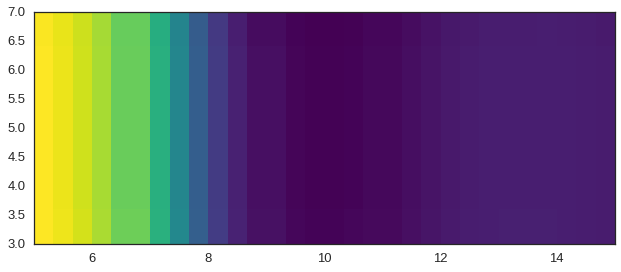

In [11]:
plt.imshow(grav.reshape(20,30), cmap='viridis', origin='lower', extent=[5,15,3,7])

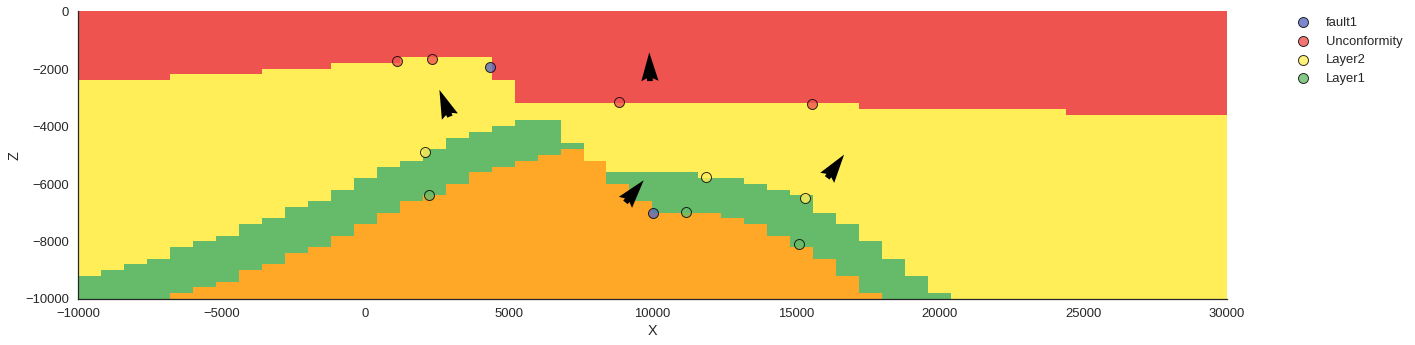

In [12]:
gp.plot_section(geo_data_g, lith[0], 25, direction='y',plot_data=True)
